<a href="https://colab.research.google.com/github/yaffawijaya/Prediksi-Harga-Saham-PT-Telkom-Indonesia-01-01-2021-sampai-01-06-2022-/blob/main/Prediksi_Pergerakan_Harga_Saham_2_Kuarter_PT_Telkom_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
!pip install yfinance
!pip install pandas-datareader

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import math

#Read Data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2020-01-02 00:00:00+07:00 to 2020-12-30 00:00:00+07:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          242 non-null    float64
 1   High          242 non-null    float64
 2   Low           242 non-null    float64
 3   Close         242 non-null    float64
 4   Volume        242 non-null    int64  
 5   Dividends     242 non-null    float64
 6   Stock Splits  242 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.2 KB


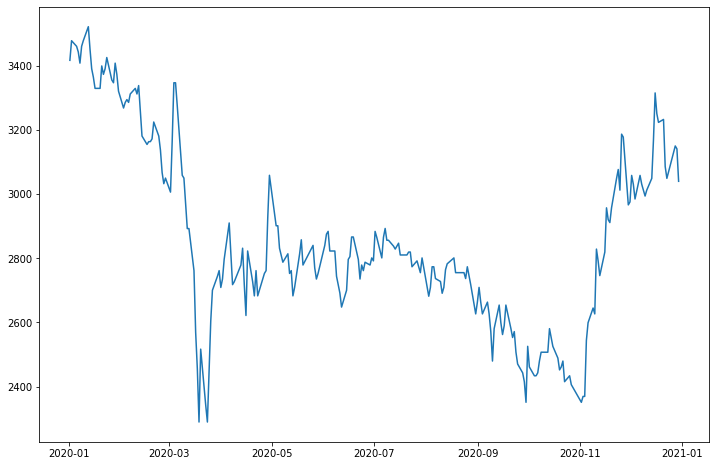

In [ ]:
sin = yf.Ticker ("TLKM.JK")
hist = sin.history(start= "2020-01-01", end = "2021-01-01")
hist.info()
fig,ax = plt.subplots(1,figsize= (12,8))
ax.plot(hist['Close'])
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2021-01-04 00:00:00+07:00 to 2021-06-30 00:00:00+07:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          120 non-null    float64
 1   High          120 non-null    float64
 2   Low           120 non-null    float64
 3   Close         120 non-null    float64
 4   Volume        120 non-null    int64  
 5   Dividends     120 non-null    float64
 6   Stock Splits  120 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.6 KB


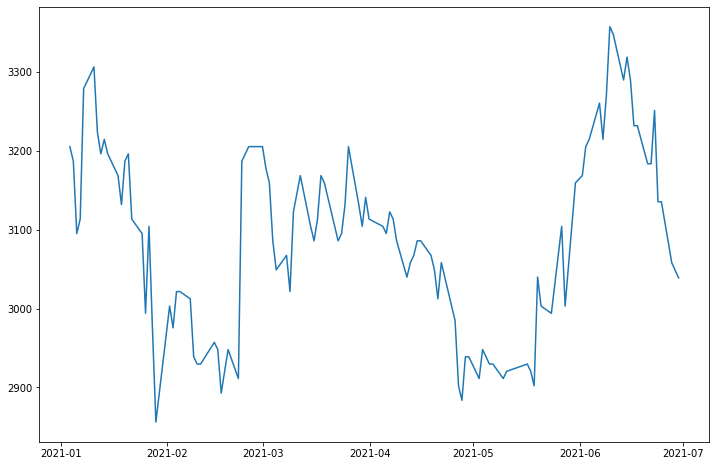

In [ ]:
sineval = yf.Ticker ("TLKM.JK")
histeval = sineval.history(start= "2021-01-01", end = "2021-07-01")
histeval.info()
fig,ax = plt.subplots(1,figsize= (12,8))
ax.plot(histeval['Close'])
plt.show()

# Pendekatan Empiris

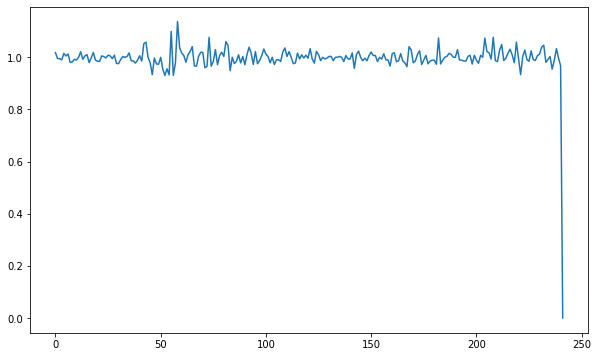

Nilai Parameter u Pendekatan Empiris 1.0185832732242366
Nilai Parameter d Pendekatan Empiris 0.9725009047410694
Nilai Parameter p Pendekatan Empiris 0.5041322314049587


In [ ]:
#Pendekatan Empiris
hist['return'] = [hist.Close[i]/hist.Close[i-1] for i in range (1,len(hist))] + [0]
ret = np.array(hist['return'][0:])
fig,ax = plt.subplots(1, figsize=(10,6))
ax.plot(ret)
plt.show()


u_emp = np.mean(ret[ret>=1])
d_emp = np.mean(ret[ret<1])
p_emp = len(ret[ret>=1])/len(ret)
avret = np.mean(ret)
print('Nilai Parameter u Pendekatan Empiris',u_emp)
print('Nilai Parameter d Pendekatan Empiris',d_emp)
print('Nilai Parameter p Pendekatan Empiris',p_emp)

In [ ]:
#MC untuk Empiris
s0_emp = histeval.Close[0]
N  = 120
M = 119
s_list_emp = np.zeros((M,N))
for i in range(M):
  for j in range(N):
    x = np.random.binomial(i+1,p_emp)
    s_list_emp[i,j] = s0_emp * u_emp**(x) * d_emp**((i+1)-x)

mean_s_emp = []
for i in range(N):
  tot = 0
  for j in range(M):
    tot += s_list_emp[j][i]
  mean_s_emp.append(tot/M)

std_emp = []
for i in range(N):
  tmp = []
  for j in range(M):
    tmp.append(s_list_emp[j][i])
  std_emp.append(np.std(tmp))

sel_kp_plus_emp = []
for i in range(120):
  sel_kp_plus_emp.append(mean_s_emp[i] + 1.96 * std_emp[i])

sel_kp_min_emp = []
for i in range(120):
  sel_kp_min_emp.append(mean_s_emp[i] - 1.96 * std_emp[i])



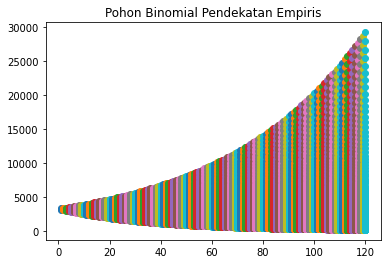

In [ ]:
#Pohon Binomial
price = np.zeros((N+1,N+1), float)
for i in range(1,N+1): 
  for j in reversed(range(i+1)):
    price[j,i] = s0_emp*u_emp**(j)*d_emp**(i-j)
  plt.scatter([i for k in range(len(price[0:i+1,i]))], price[0:i+1,i])
plt.title('Pohon Binomial Pendekatan Empiris')
plt.show()

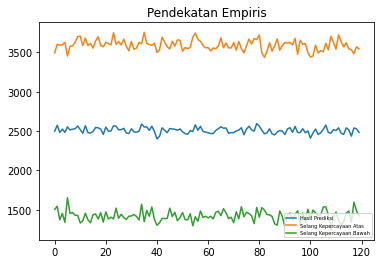

In [ ]:
#Selang Kepercayaan
plt.plot(mean_s_emp)
plt.plot(sel_kp_plus_emp)
plt.plot(sel_kp_min_emp)
plt.legend(['Hasil Prediksi','Selang Kepercayaan Atas','Selang Kepercayaan Bawah'],fontsize=5)
plt.title('Pendekatan Empiris')
plt.show()

Nilai MAE untuk Pendekatan Empiris :  579.8733969059637


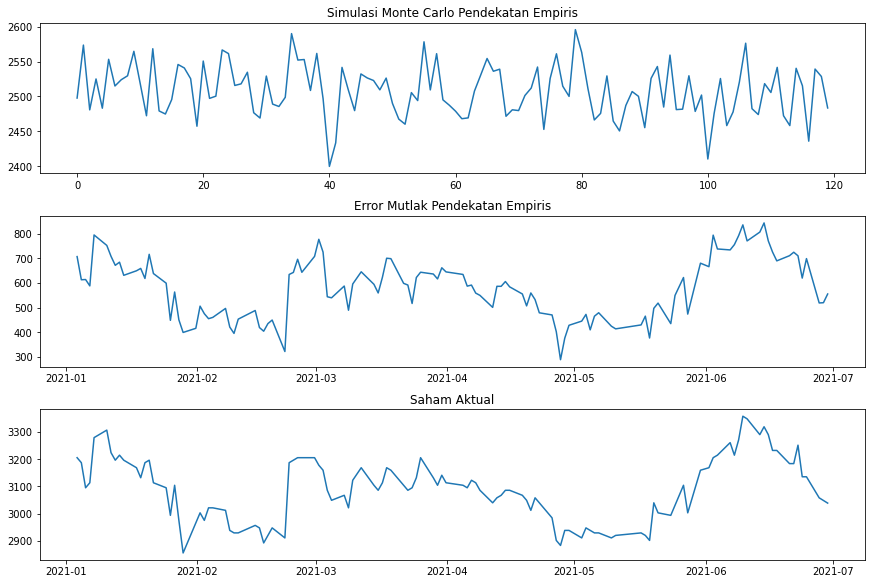

In [ ]:
#MAE ERROR
sel_emp = abs(histeval.Close - mean_s_emp)
mae_emp = np.mean(sel_emp)
print('Nilai MAE untuk Pendekatan Empiris : ',mae_emp)

fig,ax = plt.subplots(3,figsize=(12,8),constrained_layout=True)
ax[0].plot(mean_s_emp)
ax[1].plot(sel_emp)
ax[2].plot(histeval.Close)
ax[0].set_title('Simulasi Monte Carlo Pendekatan Empiris')
ax[1].set_title('Error Mutlak Pendekatan Empiris')
ax[2].set_title('Saham Aktual')
plt.show()

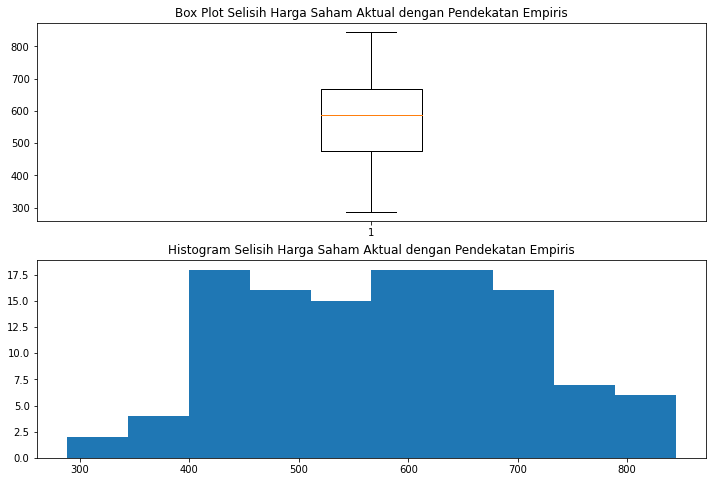

In [ ]:
#Box Plot and Histogram
diff_emp = abs(histeval.Close - mean_s_emp)
fig,ax = plt.subplots(2,figsize=(12,8))
ax[0].boxplot(diff_emp)
ax[1].hist(diff_emp)
ax[0].set_title('Box Plot Selisih Harga Saham Aktual dengan Pendekatan Empiris')
ax[1].set_title('Histogram Selisih Harga Saham Aktual dengan Pendekatan Empiris')
plt.show()

# Model CRR

In [ ]:
#Model CRR
logS= np.log(np.array([hist.Close[i] for i in range(0,int(len(hist)))]))
sig = np.sqrt(np.std(logS)/1)# volatilitas harga saham

dt = 1/242
u_crr=np.exp(sig*np.sqrt(dt))
d_crr = np.mean(ret[ret<1])
r = 0.0375
p_crr =(np.exp(-r*dt)-d_crr)/(u_crr-d_crr)

s0_crr = histeval.Close[0]
N = 120
M = 119
s_list_crr = np.zeros((M,N))
for i in range(M):
  for j in range(N):
    x = np.random.binomial(i+1,p_crr)
    s_list_crr[i,j] = s0_crr * u_crr**(x) * d_crr**((i+1)-x)

mean_s_crr = []
for i in range(N):
  tot = 0
  for j in range(M):
    tot += s_list_crr[j][i]
  mean_s_crr.append(tot/M)

std_crr = []
for i in range(N):
  tmp = []
  for j in range(M):
    tmp.append(s_list_crr[j][i])
  std_crr.append(np.std(tmp))


sel_kp_plus_crr = []
for i in range(120):
  sel_kp_plus_crr.append(mean_s_crr[i] + 1.96 * std_crr[i])

sel_kp_min_crr = []
for i in range(120):
  sel_kp_min_crr.append(mean_s_crr[i] - 1.96 * std_crr[i])


print('Nilai Parameter u Model CRR',u_crr)
print('Nilai Parameter d Model CRR',d_crr)
print('Nilai Parameter p Model CRR',p_crr)
print('Nilai Parameter sigma Model CRR',sig)

Nilai Parameter u Model CRR 1.0204652898288238
Nilai Parameter d Model CRR 0.972500905014338
Nilai Parameter p Model CRR 0.57009275568137
Nilai Parameter sigma Model CRR 0.31515125231293994


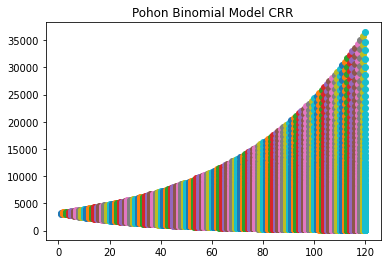

In [ ]:
#Pohon Binomial
price = np.zeros((N+1,N+1), float)
for i in range(1,N+1):
  for j in reversed(range(i+1)):
    price[j,i] = s0_crr*u_crr**(j)*d_crr**(i-j)
  plt.scatter([i for k in range(len(price[0:i+1,i]))], price[0:i+1,i])
plt.title('Pohon Binomial Model CRR')
plt.show()

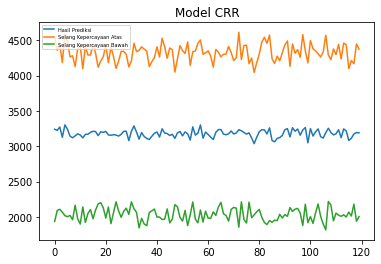

In [ ]:
#Selang Kepercayaan
plt.plot(mean_s_crr)
plt.plot(sel_kp_plus_crr)
plt.plot(sel_kp_min_crr)
plt.legend(['Hasil Prediksi','Selang Kepercayaan Atas','Selang Kepercayaan Bawah'],fontsize=5)
plt.title('Model CRR')
plt.show()

Nilai MAE untuk Model CRR :  126.59891498798578


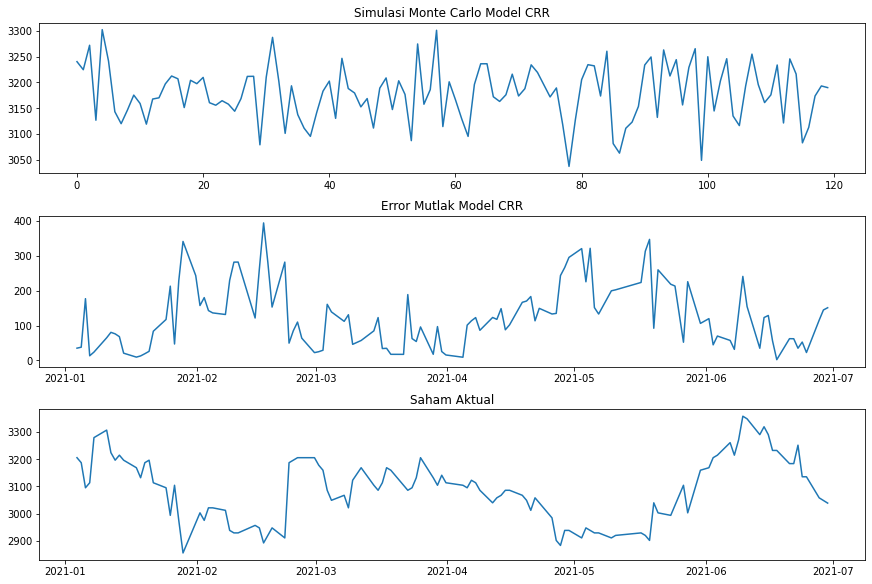

In [ ]:
#MAE Error
sel_crr = abs(histeval.Close - mean_s_crr)
mae_crr = np.mean(sel_crr)
print('Nilai MAE untuk Model CRR : ',mae_crr)

fig,ax = plt.subplots(3,figsize=(12,8),constrained_layout=True)
ax[0].plot(mean_s_crr)
ax[1].plot(sel_crr)
ax[2].plot(histeval.Close)
ax[0].set_title('Simulasi Monte Carlo Model CRR')
ax[1].set_title('Error Mutlak Model CRR')
ax[2].set_title('Saham Aktual')
plt.show()

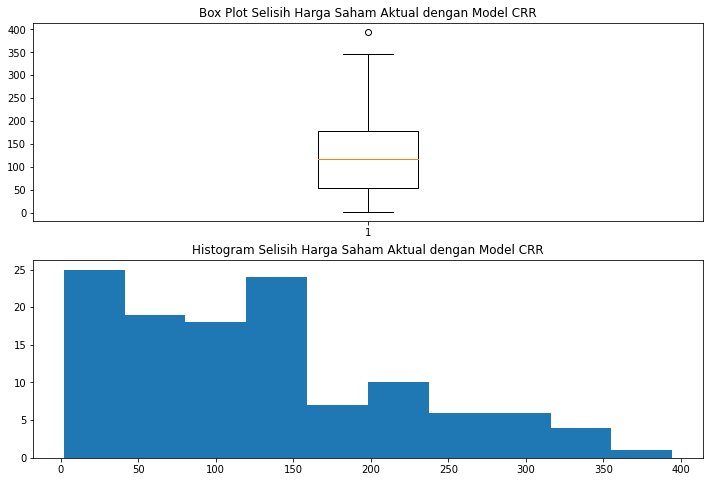

In [ ]:
#Box Plot and Histogram
diff_crr = abs(histeval.Close - mean_s_crr)
fig,ax = plt.subplots(2,figsize=(12,8))
ax[0].boxplot(diff_crr)
ax[1].hist(diff_crr)
ax[0].set_title('Box Plot Selisih Harga Saham Aktual dengan Model CRR')
ax[1].set_title('Histogram Selisih Harga Saham Aktual dengan Model CRR')
plt.show()